In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("melb_data.csv")

In [3]:
# drop non-informative or unique columns
df = df.drop(["Address"], axis=1)

# drop rows with missing target column ('Price') if necessary
df = df.dropna(subset=["Price"])

In [4]:
# encode categorical columns

label_encodable = ["Suburb", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]
for col in label_encodable:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col]) #(maps each to a number (e.g., Abbotsford → 0, Brunswick → 1, ...))

In [5]:
print(df.isna().sum())

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [6]:
# impute missing numerical values (replacing NaNs with the mean of each column

cols_to_impute = ['Car', 'BuildingArea', 'YearBuilt']
imputer = SimpleImputer(strategy='mean')
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [7]:
print(df.isna().sum()) #should have no more NaNs

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [8]:
#convert date to a numeric data (StandardScaler does not work with date string like '3/12/2016')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.drop(columns=['Date'])

print(df.head())

   Suburb  Rooms  Type      Price  Method  SellerG  Distance  Postcode  \
0       0      2     0  1480000.0       1       23       2.5    3067.0   
1       0      2     0  1035000.0       1       23       2.5    3067.0   
2       0      3     0  1465000.0       3       23       2.5    3067.0   
3       0      3     0   850000.0       0       23       2.5    3067.0   
4       0      4     0  1600000.0       4      155       2.5    3067.0   

   Bedroom2  Bathroom  ...  Landsize  BuildingArea    YearBuilt  CouncilArea  \
0       2.0       1.0  ...     202.0     151.96765  1964.684217           31   
1       2.0       1.0  ...     156.0      79.00000  1900.000000           31   
2       3.0       2.0  ...     134.0     150.00000  1900.000000           31   
3       3.0       2.0  ...      94.0     151.96765  1964.684217           31   
4       3.0       1.0  ...     120.0     142.00000  2014.000000           31   

   Lattitude  Longtitude  Regionname  Propertycount  Year  Month  
0   -37

In [9]:
# feature Scaling (standardizing puts every feature on the same scale so they contribute equally)
# example: 'Price' in dollars ranges in the millions while 'Rooms' ranges 1-6
# they need to be scaled properly as to not skew the clusters

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [11]:
# run KMeans clustering with an arbitrary number of clusters (e.g., 3)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [12]:
# add cluster labels to the original DataFrame
df["Cluster"] = kmeans.labels_

print(df["Cluster"].value_counts())

Cluster
1    6004
2    4131
0    3445
Name: count, dtype: int64


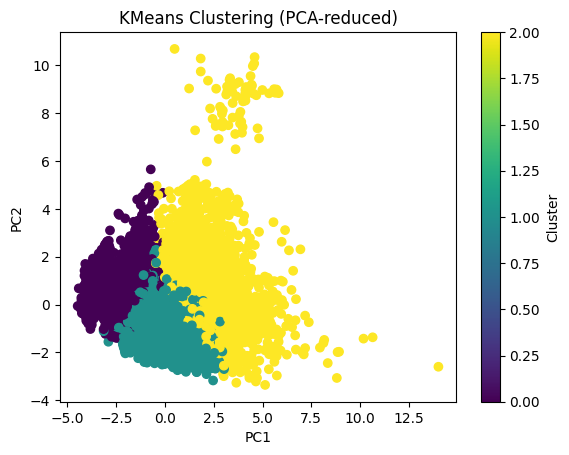

In [20]:
#show graph for clusters

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()